# IPL Score Prediction using Machine Learning

The Dataset contains ball by ball information of the matches played between IPL Teams of Season 1 to 10, i.e. from 2008 to 2017.
This Machine Learning model adapts a Regression Appoach to predict the score of the First Inning of an IPL Match.

In [1]:
# Importing Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing dataset
data=pd.read_csv('data.csv')
data.head()

,mid,date,venue,batting_team,bowling_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [3]:
data.shape

(76014, 15)

#### Dataset Description

• mid: Unique match id.

• date: Date on which the match was played.

• venue: Stadium where match was played.

• battingteam: Batting team name.

• bowlingteam: Bowling team name.

• batsman: Batsman who faced that particular ball.

• bowler: Bowler who bowled that particular ball.

• runs: Runs scored by team till that point of instance.

• wickets: Number of Wickets fallen of the team till that point of instance.

• overs: Number of Overs bowled till that point of instance.

• runslast5: Runs scored in previous 5 overs.

• wicketslast5: Number of Wickets that fell in previous 5 overs.

• striker: max(runs scored by striker, runs scored by non-striker).

• non-striker: min(runs scored by striker, runs scored by non-striker).

• total: Total runs scored by batting team at the end of first innings.

# Exploratory Data Analysis

In [5]:
# Describing Numerical Values of the Dataset
data.describe()

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
count,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000
mean,308.627740,74.889349,2.415844,9.783068,33.216434,1.120307,24.962283,8.869287,160.901452
std,178.156878,48.823327,2.015207,5.772587,14.914174,1.053343,20.079752,10.795742,29.246231
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000
25%,154.000000,34.000000,1.000000,4.600000,24.000000,0.000000,10.000000,1.000000,142.000000
50%,308.000000,70.000000,2.000000,9.600000,34.000000,1.000000,20.000000,5.000000,162.000000
75%,463.000000,111.000000,4.000000,14.600000,43.000000,2.000000,35.000000,13.000000,181.000000
max,617.000000,263.000000,10.000000,19.600000,113.000000,7.000000,175.000000,109.000000,263.000000


In [4]:
data.median()

mid               308.0
runs               70.0
wickets             2.0
overs               9.6
runs_last_5        34.0
wickets_last_5      1.0
striker            20.0
non-striker         5.0
total             162.0
dtype: float64

In [6]:
# Information (not-null count and data type) About Each Column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   batting_team    76014 non-null  object 
 4   bowling_team    76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


In [7]:
# Number of Unique Values in each column 
data.nunique()

mid               617
date              442
venue              35
batting_team       14
bowling_team       14
batsman           411
bowler            329
runs              252
wickets            11
overs             140
runs_last_5       102
wickets_last_5      8
striker           155
non-striker        88
total             138
dtype: int64

In [8]:
# Datatypes of all Columns
data.dtypes

mid                 int64
date               object
venue              object
batting_team       object
bowling_team       object
batsman            object
bowler             object
runs                int64
wickets             int64
overs             float64
runs_last_5         int64
wickets_last_5      int64
striker             int64
non-striker         int64
total               int64
dtype: object

In [9]:
#Checking null values
data.isna().sum()

mid               0
date              0
venue             0
batting_team      0
bowling_team      0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
dtype: int64

## Data Cleaning

Removing Irrelevant Data colunms

In [10]:
# Names of all columns
data.columns

Index(['mid', 'date', 'venue', 'batting_team', 'bowling_team', 'batsman',
       'bowler', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'striker', 'non-striker', 'total'],
      dtype='object')

We don’t need all the features or columns in order to create the model. It will reduce model accuracy, so we are dropping some of the features that don’t affect our result. 

Here, we can see that columns ['mid', 'date', 'venue', 'batsman', 'bowler', 'striker', 'non-striker'] won't provide any relevant information for our model to train

In [11]:
# Drop Irrelevant Columns
cols_to_drop = ['mid', 'date', 'venue','batsman', 'bowler', 'striker', 'non-striker']
data.drop(cols_to_drop, axis=1,inplace=True)

In [12]:
data.head()

,batting_team,bowling_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


array([[<AxesSubplot:title={'center':'runs'}>,
        <AxesSubplot:title={'center':'wickets'}>],
       [<AxesSubplot:title={'center':'overs'}>,
        <AxesSubplot:title={'center':'runs_last_5'}>],
       [<AxesSubplot:title={'center':'wickets_last_5'}>,
        <AxesSubplot:title={'center':'total'}>]], dtype=object)

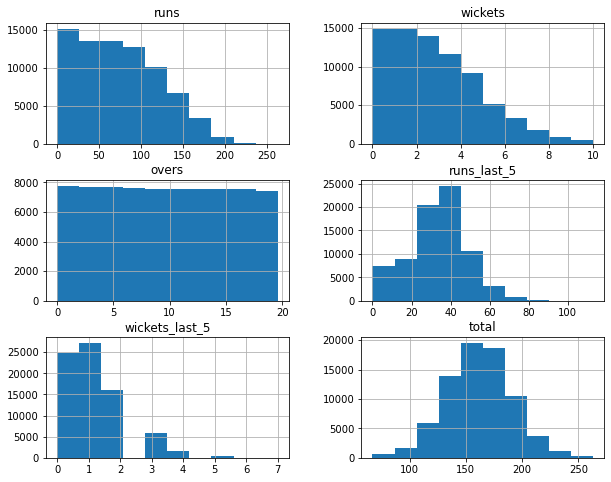

In [13]:
#Histogram for numerical cols
data.hist(figsize=(10,8))

<AxesSubplot:>

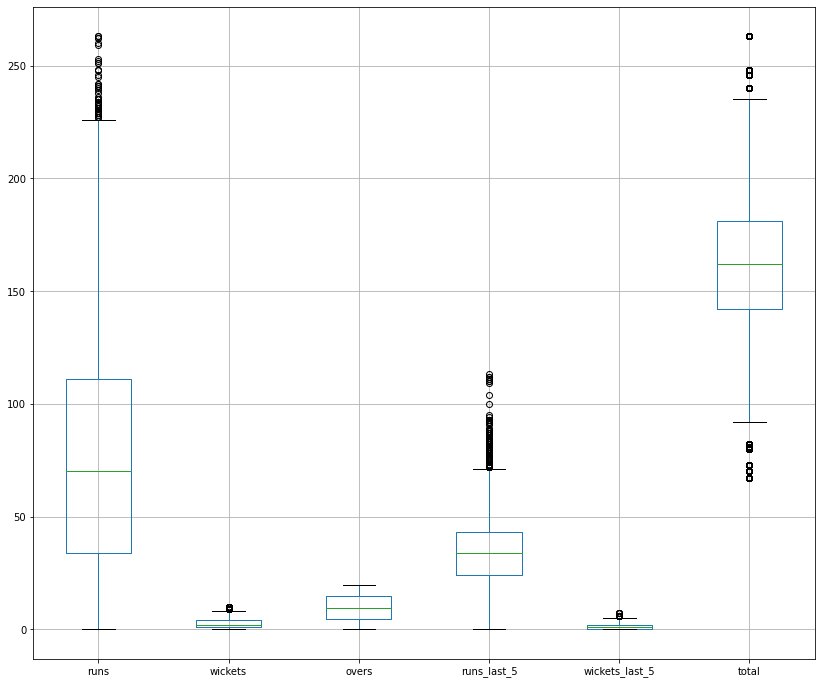

In [14]:
#Outlier Detection
data.boxplot(figsize=(14,12))

Text(0.5, 1.0, 'Box plot of overs column ')

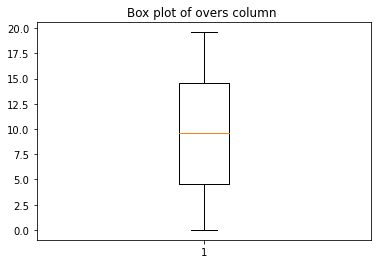

In [15]:
plt.boxplot(data['overs'])                             #outlier detection using boxplot
plt.title('Box plot of overs column ')

Text(0.5, 1.0, 'Box plot of total column ')

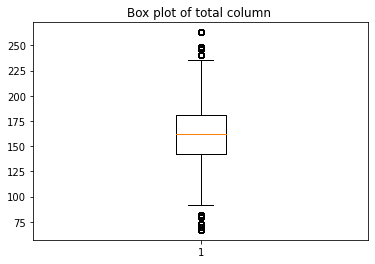

In [16]:
plt.boxplot(data['total'])                             #outlier detection using boxplot
plt.title('Box plot of total column ')

In [17]:
Q1=np.percentile(data['total'],25,interpolation='midpoint')
Q2=np.percentile(data['total'],50,interpolation='midpoint')
Q3=np.percentile(data['total'],75,interpolation='midpoint')

In [18]:
print(Q1)
print(Q2)
print(Q3)

142.0
162.0
181.0


In [19]:
IQR = Q3-Q1

In [20]:
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print(low_lim)
print(up_lim)

83.5
239.5


In [21]:
outlier = []
for x in data['total']:
    if ((x>up_lim) or (x<low_lim)):
        outlier.append(x)

In [22]:
len(outlier)

1218

In [23]:
#outlier indexes
out_index=np.where(data['total']<83.5)
#print(out_index)
len(out_index[0])

722

In [24]:
#outlier indexes
out_index=np.where(data['total']>239)
#print(out_index)
len(out_index[0])

496

In [25]:
Q1=np.percentile(data['wickets'],25,interpolation='midpoint')
Q2=np.percentile(data['wickets'],50,interpolation='midpoint')
Q3=np.percentile(data['wickets'],75,interpolation='midpoint')
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
outlier = []
for x in data['wickets']:
    if ((x>up_lim) or (x<low_lim)):
        outlier.append(x)
len(outlier)


473

In [26]:
Q1=np.percentile(data['runs_last_5'],25,interpolation='midpoint')
Q2=np.percentile(data['runs_last_5'],50,interpolation='midpoint')
Q3=np.percentile(data['runs_last_5'],75,interpolation='midpoint')
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
outlier = []
for x in data['runs_last_5']:
    if ((x>up_lim) or (x<low_lim)):
        outlier.append(x)
len(outlier)

439

In [27]:
Q1=np.percentile(data['wickets_last_5'],25,interpolation='midpoint')
Q2=np.percentile(data['wickets_last_5'],50,interpolation='midpoint')
Q3=np.percentile(data['wickets_last_5'],75,interpolation='midpoint')
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
outlier = []
for x in data['wickets_last_5']:
    if ((x>up_lim) or (x<low_lim)):
        outlier.append(x)
len(outlier)

70

Text(0.5, 1.0, 'Box plot of wickets column ')

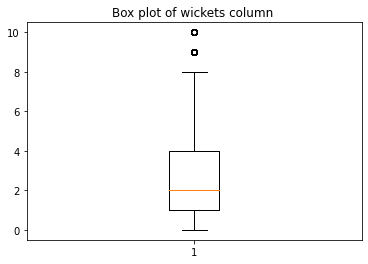

In [28]:
plt.boxplot(data['wickets'])                             #outlier detection using boxplot
plt.title('Box plot of wickets column ')

In [29]:
Q1=np.percentile(data['wickets'],25,interpolation='midpoint')
Q2=np.percentile(data['wickets'],50,interpolation='midpoint')
Q3=np.percentile(data['wickets'],75,interpolation='midpoint')
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print(low_lim)
print(up_lim)

-3.5
8.5


In [30]:
#outlier indexes
out_index=np.where(data['wickets']>8)
#print(out_index)
len(out_index[0])

473

Text(0.5, 1.0, 'Box plot of runs column ')

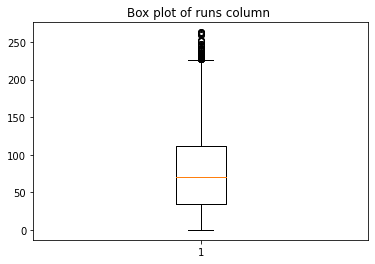

In [31]:
plt.boxplot(data['runs'])                             #outlier detection using boxplot
plt.title('Box plot of runs column ')

In [32]:
Q1=np.percentile(data['runs'],25,interpolation='midpoint')
Q2=np.percentile(data['runs'],50,interpolation='midpoint')
Q3=np.percentile(data['runs'],75,interpolation='midpoint')

In [33]:
print(Q1)
print(Q2)
print(Q3)

34.0
70.0
111.0


In [34]:
IQR = Q3-Q1

In [35]:
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print(low_lim)
print(up_lim)

-81.5
226.5


In [36]:
outlier = []
for x in data['total']:
    if ((x>up_lim) or (x<low_lim)):
        outlier.append(x)

In [37]:
len(outlier)

1252

In [38]:
#outlier indexes
out_index=np.where(data['total']<0)
#print(out_index)
len(out_index[0])

0

In [39]:
#outlier indexes
out_index=np.where(data['total']>226)
#print(out_index)
len(out_index[0])

1252

# Data Preprocessing

In [40]:
#Now let’s look into the total teams listed in this dataset.
data['batting_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

Here, you can see the name Delhi Daredevils and Delhi Capitals; Delhi Daredevils is the old name of the Delhi Capitals. Similarly, Kings XI Punjab is the old name of Punjab Kings. So we are changing the old name to the newer one.

In [41]:
#for Delhi Capitals
data['batting_team']=data['batting_team'].str.replace('Delhi Daredevils','Delhi Capitals')
data['bowling_team']=data['bowling_team'].str.replace('Delhi Daredevils','Delhi Capitals')

#for Punjab Kings
data['batting_team']=data['batting_team'].str.replace('Kings XI Punjab','Punjab Kings')
data['bowling_team']=data['bowling_team'].str.replace('Kings XI Punjab','Punjab Kings')

In [42]:
data['batting_team'].unique(),data['bowling_team'].unique()

(array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
        'Mumbai Indians', 'Deccan Chargers', 'Punjab Kings',
        'Royal Challengers Bangalore', 'Delhi Capitals',
        'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
        'Rising Pune Supergiants', 'Gujarat Lions',
        'Rising Pune Supergiant'], dtype=object),
 array(['Royal Challengers Bangalore', 'Punjab Kings', 'Delhi Capitals',
        'Kolkata Knight Riders', 'Rajasthan Royals', 'Mumbai Indians',
        'Chennai Super Kings', 'Deccan Chargers', 'Pune Warriors',
        'Kochi Tuskers Kerala', 'Sunrisers Hyderabad',
        'Rising Pune Supergiants', 'Gujarat Lions',
        'Rising Pune Supergiant'], dtype=object))

In [43]:
data['batting_team'].nunique(),data['bowling_team'].nunique()

(14, 14)

### Keeping only Consistent Teams 
(we have to remove teams that are not playing today in current season of IPL and we just have to keep consistent teams.)

In [44]:
const_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
              'Mumbai Indians', 'Punjab Kings', 'Royal Challengers Bangalore',
              'Delhi Capitals', 'Sunrisers Hyderabad']


In [45]:
#Removing Inconsistent Teams
data = data[(data['batting_team'].isin(const_teams)) & (data['bowling_team'].isin(const_teams))]

In [46]:
data.head()

,batting_team,bowling_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


#### Remove First 5 Overs of every match

We will take data that is after the 5 overs because the initial stages of the match do not play that much important part in deciding the score.

In [47]:
data = data[data['overs'] >= 5.0]
data.head()

,batting_team,bowling_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


In [48]:
data.shape

(40108, 8)

###### Plotting a Correlation Matrix of current data

<AxesSubplot:>

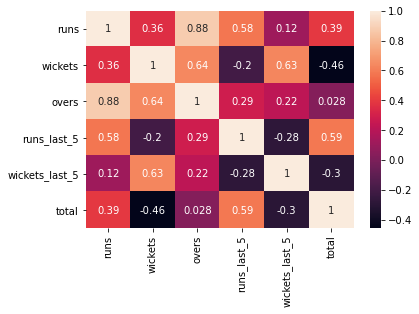

In [49]:
from seaborn import heatmap
heatmap(data=data.corr(), annot=True)

In [50]:
#num_cols=['runs','wickets','overs','runs_last_5','wickets_last_5', 'total']

In [51]:
#from sklearn.preprocessing import StandardScaler                #Standardization
#scalar = StandardScaler()
#scaled_data=scalar.fit_transform(data[num_cols])
#scaled_data=pd.DataFrame(scaled_data)
#scaled_data

In [52]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# x_train.loc[:,nume_cols] = sc.fit_transform(x_train[nume_cols])
# x_test.loc[:,nume_cols] = sc.fit_transform(x_test[nume_cols])

# One- Hot Encoding

In [53]:
#Converting categorical columns to dummy variables.
data = pd.get_dummies(data,columns=['batting_team','bowling_team'])
data.head()

,runs,wickets,overs,runs_last_5,wickets_last_5,total,batting_team_Chennai Super Kings,batting_team_Delhi Capitals,batting_team_Kolkata Knight Riders,batting_team_Mumbai Indians,...,batting_team_Royal Challengers Bangalore,batting_team_Sunrisers Hyderabad,bowling_team_Chennai Super Kings,bowling_team_Delhi Capitals,bowling_team_Kolkata Knight Riders,bowling_team_Mumbai Indians,bowling_team_Punjab Kings,bowling_team_Rajasthan Royals,bowling_team_Royal Challengers Bangalore,bowling_team_Sunrisers Hyderabad
32,61,0,5.1,59,0,222,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
33,61,1,5.2,59,1,222,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
34,61,1,5.3,59,1,222,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
35,61,1,5.4,59,1,222,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
36,61,1,5.5,58,1,222,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


Just changing positions of columns.

In [54]:
cols = ['batting_team_Chennai Super Kings', 'batting_team_Delhi Capitals', 'batting_team_Kolkata Knight Riders',
              'batting_team_Mumbai Indians','batting_team_Punjab Kings','batting_team_Rajasthan Royals',
              'batting_team_Royal Challengers Bangalore', 'batting_team_Sunrisers Hyderabad',
              'bowling_team_Chennai Super Kings', 'bowling_team_Delhi Capitals', 'bowling_team_Kolkata Knight Riders',
              'bowling_team_Mumbai Indians','bowling_team_Punjab Kings', 'bowling_team_Rajasthan Royals',
              'bowling_team_Royal Challengers Bangalore', 'bowling_team_Sunrisers Hyderabad', 'runs', 'wickets', 'overs',
       'runs_last_5', 'wickets_last_5', 'total']
df = pd.DataFrame(data, columns=cols)

In [55]:
# Visualizing Encoded Data
df.head()

,batting_team_Chennai Super Kings,batting_team_Delhi Capitals,batting_team_Kolkata Knight Riders,batting_team_Mumbai Indians,batting_team_Punjab Kings,batting_team_Rajasthan Royals,batting_team_Royal Challengers Bangalore,batting_team_Sunrisers Hyderabad,bowling_team_Chennai Super Kings,bowling_team_Delhi Capitals,...,bowling_team_Punjab Kings,bowling_team_Rajasthan Royals,bowling_team_Royal Challengers Bangalore,bowling_team_Sunrisers Hyderabad,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,61,0,5.1,59,0,222
33,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,61,1,5.2,59,1,222
34,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,61,1,5.3,59,1,222
35,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,61,1,5.4,59,1,222
36,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,61,1,5.5,58,1,222


In [56]:
df.shape

(40108, 22)

# Model Building and Evaluation

##### Splitting of Independent and Dependent variables

In [57]:
x = df.drop(['total'], axis=1)
y = df['total']

##### Performing Train and Test Splits

In [58]:
# Perform 80 : 20 Train-Test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,shuffle=True)

In [59]:
x_train.shape, y_train.shape

((32086, 21), (32086,))

In [60]:
x_test.shape, y_test.shape

((8022, 21), (8022,))

Training and Testing on different Machine Learning Algorithms for the best algorithm to choose from

In [61]:
# Keeping track of model perfomances
models = dict()

### 1. Linear Regression

In [62]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
# Train Model
linreg.fit(x_train, y_train)

LinearRegression()

In [63]:
# Evaluate Model
train_score_linreg = str(linreg.score(x_train, y_train) * 100)
test_score_linreg = str(linreg.score(x_test, y_test) * 100)
print(f'Train Score : {train_score_linreg[:5]}%\nTest Score : {test_score_linreg[:5]}%')
models["linreg"] = test_score_linreg

Train Score : 65.96%
Test Score : 65.71%


In [64]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, r2_score

In [65]:
print("---- Linear Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, linreg.predict(x_test))))
print("Mean Squared Error (MSE): {}".format(mse(y_test, linreg.predict(x_test))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, linreg.predict(x_test)))))
r2_score(y_test, linreg.predict(x_test))

---- Linear Regression - Model Evaluation ----
Mean Absolute Error (MAE): 12.931979161010874
Mean Squared Error (MSE): 294.9379815817945
Root Mean Squared Error (RMSE): 17.173758516463263


0.6571324029552261

### 2. Decision Tree Regressor

In [66]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
tree.fit(x_train, y_train)

DecisionTreeRegressor()

In [67]:
# Evaluate Model
train_score_tree = str(tree.score(x_train, y_train) * 100)
test_score_tree = str(tree.score(x_test, y_test) * 100)
print(f'Train Score : {train_score_tree[:5]}%\nTest Score : {test_score_tree[:5]}%')
models["tree"] = test_score_tree

Train Score : 99.98%
Test Score : 85.54%


In [68]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse
print("---- Decision Tree Regressor - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, tree.predict(x_test))))
print("Mean Squared Error (MSE): {}".format(mse(y_test, tree.predict(x_test))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, tree.predict(x_test)))))
r2_score(y_test, tree.predict(x_test))

---- Decision Tree Regressor - Model Evaluation ----
Mean Absolute Error (MAE): 4.085577162802294
Mean Squared Error (MSE): 124.38572051857392
Root Mean Squared Error (RMSE): 11.152834640510632


0.8554006748396397

### 3. Random Forest Regression

In [69]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
# Train Model
forest.fit(x_train, y_train)

RandomForestRegressor()

In [70]:
# Evaluate Model
train_score_forest = str(forest.score(x_train, y_train)*100)
test_score_forest = str(forest.score(x_test, y_test)*100)
print(f'Train Score : {train_score_forest[:5]}%\nTest Score : {test_score_forest[:5]}%')
models["forest"] = test_score_forest

Train Score : 99.07%
Test Score : 93.59%


In [71]:
print("---- Random Forest Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, forest.predict(x_test))))
print("Mean Squared Error (MSE): {}".format(mse(y_test, forest.predict(x_test))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, forest.predict(x_test)))))
r2_score(y_test, forest.predict(x_test))

---- Random Forest Regression - Model Evaluation ----
Mean Absolute Error (MAE): 4.395994847502701
Mean Squared Error (MSE): 55.08162051263192
Root Mean Squared Error (RMSE): 7.421699300876581


0.9359672065116486

### 4.Lasso Regression

In [72]:
from sklearn.linear_model import LassoCV
lasso = LassoCV()
# Train Model
lasso.fit(x_train, y_train)

LassoCV()

In [73]:
# Evaluate Model
train_score_lasso = str(lasso.score(x_train, y_train)*100)
test_score_lasso = str(lasso.score(x_test, y_test)*100)
print(f'Train Score : {train_score_lasso[:5]}%\nTest Score : {test_score_lasso[:5]}%')
models["lasso"] = test_score_lasso

Train Score : 64.99%
Test Score : 64.66%


In [74]:
print("---- Lasso Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, lasso.predict(x_test))))
print("Mean Squared Error (MSE): {}".format(mse(y_test, lasso.predict(x_test))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, lasso.predict(x_test)))))
r2_score(y_test, lasso.predict(x_test))

---- Lasso Regression - Model Evaluation ----
Mean Absolute Error (MAE): 12.997143557342397
Mean Squared Error (MSE): 303.9175032617467
Root Mean Squared Error (RMSE): 17.433229857423054


0.6466936422215128

### 5.SVM

In [75]:
from sklearn.svm import SVR
svm = SVR()
# Train Model
svm.fit(x_train, y_train)

SVR()

In [76]:
train_score_svm = str(svm.score(x_train, y_train)*100)
test_score_svm = str(svm.score(x_test, y_test)*100)
print(f'Train Score : {train_score_svm[:5]}%\nTest Score : {test_score_svm[:5]}%')
models["svm"] = test_score_svm 

Train Score : 57.55%
Test Score : 57.16%


In [77]:
print("---- Support Vector Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, svm.predict(x_test))))
print("Mean Squared Error (MSE): {}".format(mse(y_test, svm.predict(x_test))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, svm.predict(x_test)))))
r2_score(y_test, svm.predict(x_test))

---- Support Vector Regression - Model Evaluation ----
Mean Absolute Error (MAE): 14.568874599091673
Mean Squared Error (MSE): 368.4795654902197
Root Mean Squared Error (RMSE): 19.195821563304335


0.5716397647323814

##  Model Selection

C:\Users\Mohan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

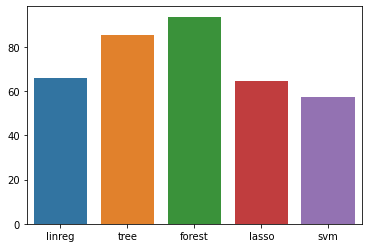

In [78]:
# for selecting the best model
from seaborn import barplot
model_names = list(models.keys())
accuracy = list(map(float, models.values()))
barplot(model_names, accuracy)

From above, we can see that **Random Forest** performed the best, closely followed by **Decision Tree**. So we will be choosing Random Forest for the final model

# Predictions

In [79]:
def predict_score(batting_team, bowling_team, runs, wickets, overs, runs_last_5, wickets_last_5, model=forest):
  prediction_array = []
  # Batting Team
  if batting_team == 'Chennai Super Kings':
    prediction_array = prediction_array + [1,0,0,0,0,0,0,0]
  elif batting_team == 'Delhi Capitals':
    prediction_array = prediction_array + [0,1,0,0,0,0,0,0]
  elif batting_team == 'Punjab Kings':
    prediction_array = prediction_array + [0,0,1,0,0,0,0,0]
  elif batting_team == 'Kolkata Knight Riders':
    prediction_array = prediction_array + [0,0,0,1,0,0,0,0]
  elif batting_team == 'Mumbai Indians':
    prediction_array = prediction_array + [0,0,0,0,1,0,0,0]
  elif batting_team == 'Rajasthan Royals':
    prediction_array = prediction_array + [0,0,0,0,0,1,0,0]
  elif batting_team == 'Royal Challengers Bangalore':
    prediction_array = prediction_array + [0,0,0,0,0,0,1,0]
  elif batting_team == 'Sunrisers Hyderabad':
    prediction_array = prediction_array + [0,0,0,0,0,0,0,1]
  # Bowling Team
  if bowling_team == 'Chennai Super Kings':
    prediction_array = prediction_array + [1,0,0,0,0,0,0,0]
  elif bowling_team == 'Delhi Capitals':
    prediction_array = prediction_array + [0,1,0,0,0,0,0,0]
  elif bowling_team == 'Punjab Kings':
    prediction_array = prediction_array + [0,0,1,0,0,0,0,0]
  elif bowling_team == 'Kolkata Knight Riders':
    prediction_array = prediction_array + [0,0,0,1,0,0,0,0]
  elif bowling_team == 'Mumbai Indians':
    prediction_array = prediction_array + [0,0,0,0,1,0,0,0]
  elif bowling_team == 'Rajasthan Royals':
    prediction_array = prediction_array + [0,0,0,0,0,1,0,0]
  elif bowling_team == 'Royal Challengers Bangalore':
    prediction_array = prediction_array + [0,0,0,0,0,0,1,0]
  elif bowling_team == 'Sunrisers Hyderabad':
    prediction_array = prediction_array + [0,0,0,0,0,0,0,1]
  prediction_array = prediction_array + [runs, wickets, overs, runs_last_5, wickets_last_5]
  prediction_array = np.array([prediction_array])
  pred = model.predict(prediction_array)
  return int(round(pred[0]))

### Test 1 (2019)
- Batting Team : **Delhi Daredevils**
- Bowling Team : **Chennai Super Kings**
- Final Score : **147/9**

In [80]:
batting_team='Delhi Capitals'
bowling_team='Chennai Super Kings'
score = predict_score(batting_team, bowling_team, overs=10.2, runs=68, wickets=3, runs_last_5=29, wickets_last_5=1)
print(f'Predicted Score : {score} || Actual Score : 147')

Predicted Score : 150 || Actual Score : 147


### Test 2 (2020 Season)
- Batting Team : **Kolkata Knight Riders**
- Bowling Team : **Chennai Super Kings**
- Final Score : **172/5**

In [81]:
batting_team="Kolkata Knight Riders"
bowling_team="Chennai Super Kings"
score = predict_score(batting_team, bowling_team, overs=18.0, runs=150, wickets=4, runs_last_5=57, wickets_last_5=1)
print(f'Predicted Score : {score} || Actual Score : 172')

Predicted Score : 174 || Actual Score : 172


### Live Test  (2022 Season)
- Batting Team : **Mumbai Indians**
- Bowling Team : **Royal Challengers Bangalore**
- Final Score : **151/6**

In [82]:
batting_team="Mumbai Indians"
bowling_team='Royal Challengers Bangalore'
score = predict_score(batting_team, bowling_team, overs=16.4, runs=119, wickets=6, runs_last_5=43, wickets_last_5=1)
print(f'Predicted Score : {score} || Actual Score : 151')

Predicted Score : 147 || Actual Score : 151


In [83]:
#batting_team='Punjab Kings'
#bowling_team='Chennai Super Kings'
#score = predict_score(batting_team, bowling_team, overs=18.0, runs=129, wickets=6, runs_last_5=34, wickets_last_5=2)
#print(f'Predicted Score : {score} || Actual Score : 153')

In [84]:
from joblib import dump

dump(forest, "forest_model.pkl")
dump(tree, "tree_model.pkl")


['tree_model.pkl']